# Template matching demo

In [2]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
from IPython import display

import cv2 as cv
import numpy as np

In [3]:
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/galaxian.mp4
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/template.png

--2023-06-27 15:34:12--  https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/galaxian.mp4
Resolving www.dais.unive.it (www.dais.unive.it)... 

157.138.20.11
Connecting to www.dais.unive.it (www.dais.unive.it)|157.138.20.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26941050 (26M) [video/mp4]
Saving to: ‘galaxian.mp4’

galaxian.mp4        100%[===================>]  25,69M  1,02MB/s    in 15s     

2023-06-27 15:34:27 (1,71 MB/s) - ‘galaxian.mp4’ saved [26941050/26941050]

--2023-06-27 15:34:27--  https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/template.png
Resolving www.dais.unive.it (www.dais.unive.it)... 157.138.20.11
Connecting to www.dais.unive.it (www.dais.unive.it)|157.138.20.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824 [image/png]
Saving to: ‘template.png’

template.png        100%[===================>]     824  --.-KB/s    in 0s      

2023-06-27 15:34:27 (366 MB/s) - ‘template.png’ saved [824/824]



Text(0.5, 1.0, 'Template')

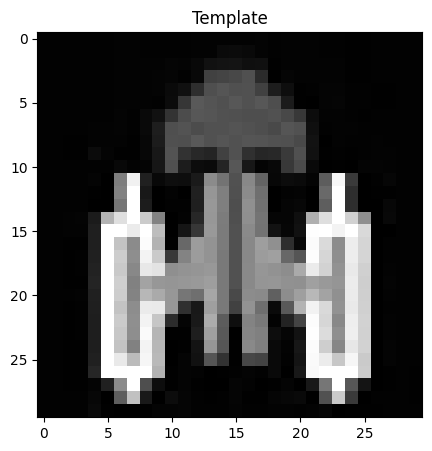

In [7]:
cap = cv.VideoCapture("galaxian.mp4") # Open the video
cap.set(cv.CAP_PROP_POS_FRAMES, 750) # Se the initial video frame

T = cv.imread("template.png", cv.IMREAD_GRAYSCALE ).astype(np.float32)
T = T - np.mean(T)
plt.figure( figsize=(5,5))
plt.imshow(T, interpolation="none", cmap="gray")
plt.title("Template")

In [ ]:
while cap.isOpened():
    display.clear_output(wait=True)
    ret,frame = cap.read()
    
    img_g = cv.cvtColor( frame, cv.COLOR_BGR2GRAY ) # Convert the frame to gray scale
    img_g = img_g.astype(np.float32)
    img_g = img_g - np.mean(img_g)
    
    conv = cv.filter2D( img_g, -1, T ) # OpenCV filter2D computes the correlation between img_g and T
    maxval = np.amax( conv )
    
    if maxval>5E6: # Correlation threshold
        maxpos = np.unravel_index( np.argmax( conv ), conv.shape )
    else:
        maxpos=[-999,-999]
    
    
    cv.rectangle( frame, (maxpos[1]-15, maxpos[0]-15),
                         (maxpos[1]+15, maxpos[0]+15), 
                         (255,0,0), 2 )
    
    plt.figure( figsize=(8,8))
    plt.axis("off")
    #img = plt.imshow(frame, interpolation="none")
    img = plt.imshow(conv, interpolation="none")
    plt.title("Ship position %d-%d  (peak val: %3.2f)"%(maxpos[1],maxpos[0],maxval))
    display.display(plt.gcf())

In [1]:
!rm galaxian.mp4 template.png